# Learning Curves
A learning curve in machine learning is a graph that compares the performance of a model on training and testing data over a varying number of training instances.

When we look at the relationship between the amount of training data and performance, we should generally see performance improve as the number of training points increases.

By separating training and testing sets and graphing performance on each separately, we can get a better idea of how well the model can generalize to unseen data.

A learning curve allows us to verify when a model has learned as much as it can about the data. When this occurs, the performance on both training and testing sets plateau and there is a consistent gap between the two error rates.

# Learning Curves
### Bias
When the training and testing errors converge and are quite high this usually means the model is biased. No matter how much data we feed it, the model cannot represent the underlying relationship and therefore has systematic high errors.

### Variance
When there is a large gap between the training and testing error this generally means the model suffers from high variance. Unlike a biased model, models that suffer from variance generally require more data to improve. We can also limit variance by simplifying the model to represent only the most important features of the data.

# Ideal Learning Curve
The ultimate goal for a model is one that has good performance that generalizes well to unseen data. In this case, both the testing and training curves converge at similar values. The smaller the gap between the training and testing sets, the better our model generalizes. The better the performance on the testing set, the better our model performs.

# Model Complexity
The visual technique of graphing performance is not limited to learning. With most models, we can change the complexity by changing the inputs or parameters.

A model complexity graph looks at training and testing curves as the model's complexity varies. The most common trend is that as a model's complexity increases, bias will fall off and variance will rise

Scikit-learn provides a tool for validation curves which can be used to monitor model complexity by varying the parameters of a model. We'll explore the specifics of how these parameters affect complexity in the next course on supervised learning.

* http://scikit-learn.org/stable/modules/learning_curve.html

# Learning Curves and Model Complexity
So what is the relationship between learning curves and model complexity?

If we were to take the learning curves of the same machine learning algorithm with the same fixed set of data, but create several graphs at different levels of model complexity, all the learning curve graphs would fit together into a 3D model complexity graph.

If we took the final testing and training errors for each model complexity and visualized them along the complexity of the model we would be able to see how well the model performs as the model complexity increases.

# Practical use of Model Complexity
Knowing that we can identify issues with bias and variance by analyzing a model complexity graph, we now have a visual tool to help identify ways to optimize our models.

This will be one of the core tools we use in the upcoming project.

In the final section, we will introduce cross validation and grid search, which will give us a concrete, systematic way of searching through different levels of complexity to find the optimal model that complexity and learning curves give us a holistic understanding of.

In [1]:
# In this exercise we'll examine a learner which has high bias, and is incapable of
# learning the patterns in the data.
# Use the learning curve function from sklearn.learning_curve to plot learning curves
# of both training and testing error.

from sklearn.linear_model import LinearRegression
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.cross_validation import KFold
import numpy as np

In [37]:
# Set the learning curve parameters; you'll need this for learning_curves
size = 1000
cv_sets = KFold(size,shuffle=True)
scorer = make_scorer(explained_variance_score)

# Create a series of data that forces a learner to have high bias
# Note for this quiz you do not need to create training and testing sets
X = np.reshape(np.random.normal(scale=2,size=size),(-1,1))
y = np.array([[1 - 2*x[0] +x[0]**2] for x in X])

In [38]:
r = LinearRegression()
r.fit(X,y)
r.fit(X,y)

z = [r.predict(x.reshape(-1,1)) for x in X]

In [39]:
z = [x[0][0] for x in z]

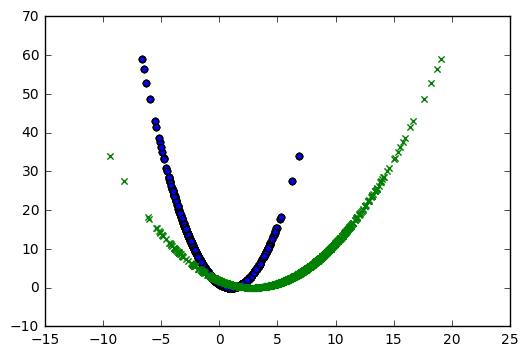

In [44]:
plt.scatter(X,y)
plt.scatter(z,y, c='g', marker='x')
plt.show()

In [49]:
def plot_curve():
    reg = LinearRegression()
    reg.fit(X,y)
    print "Regressor score: {:.4f}".format(reg.score(X,y))
    
    # TODO: Use learning_curve imported above to create learning curves from X and y.
    # You will need to use 'cv_sets' and 'scorer' as parameters in the function.
    
    from sklearn.learning_curve import learning_curve as lc
    train_sizes, train_scores, test_scores = lc(reg, X, y, cv=cv_sets, scoring=scorer)

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    # TODO: Plot the learning curves for both the training scores and testing scores.
    #       Use plt.plot() twice -- one for each score. Be sure to give them labels!
    # NOTE: Using plt.plot(train_scores) will get you 6 lines when we are looking to 
    # plot just 2(mean scores for training and testing). 
    # You can use np.mean(train_scores, axis =1) to get mean train_scores values. 
    # Similarly you can get the mean for the test_scores.
    
    # Plot aesthetics
    plt.plot(train_sizes, train_mean, '-o', c='r', label='train scoring')
    plt.plot(train_sizes, test_mean, '-o', c='g', label='cross validation scoring')
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Curve Score")
    plt.xlabel("Training Points")
    plt.legend(bbox_to_anchor=(1.1, 1.1))
    plt.show()

Regressor score: 0.3343


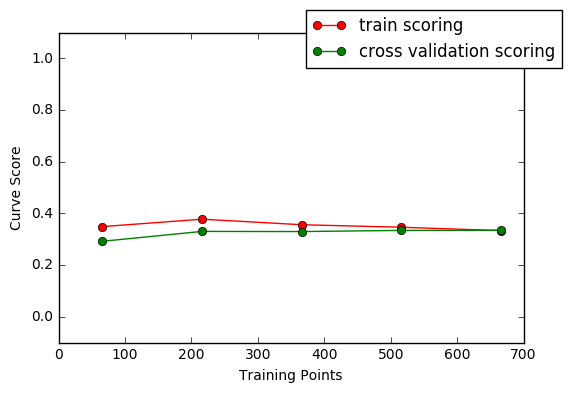

In [50]:
plot_curve()